# Hurdat2, Storm Wind Speed
In the following example we will walk through how we can leverage the `clouddrift` library to plot the storm trajectories colored by their observed temperature for all storms.

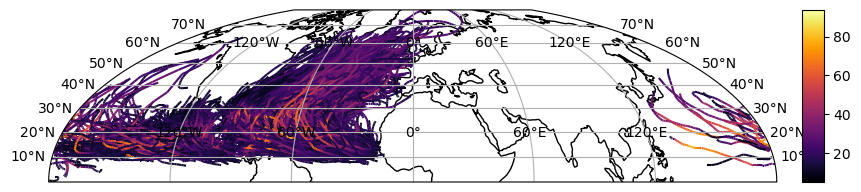

In [2]:
from clouddrift.datasets import hurdat2
from clouddrift.plotting import plot_ragged
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1 import make_axes_locatable
# %%
ds = hurdat2()

# %%
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mollweide(central_longitude=-110))
l = plot_ragged(
    ax,
    ds.lon,
    ds.lat,
    ds.rowsize,
    colors=ds.wind_speed.values,
    transform=ccrs.PlateCarree(),
    cmap="inferno",
)
ax.set_extent([-180, 180, 0, 80], crs=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels=True)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size="3%", pad=0.25, axes_class=plt.Axes)
fig.colorbar(l, cax=cax)